In [642]:
import os
import csv
import numpy as np
import json
from os import path
from wrapper import pretty_num



In [643]:
approaches_reference = {
    'approach01' : {
        'name' : 'NStPc',
        'description' : "No additional path, heatmap simple threshold elimination, pre-computed path on full graph"
    },
    'approach02' : {
        'name' : 'NStSg',
        'description' : "No additional path, heatmap simple threshold elimination, subgraph approach"
    },
    'approach03': {
        'name' : 'NStSgPc',
        'description' : 'No additional paths, simple threshold elimination, precomputed path on subgraph' 
    },
    'approach04' : {
        'name' : 'AStPc',
        'description' : "Additional path, heatmap simple threshold elimination, pre-computed path on full graph"
    },
    'approach05' : {
        'name' : 'AStSg',
        'description' : "Additional path, heatmap simple threshold elimination, subgraph approach"
    },
    'approach06': {
        'name' : 'AStSgPc',
        'description' : 'Additional paths, simple threshold elimination, precomputed path on subgraph' 
    },
    'approach07' : {
        'name' : 'NStSgC',
        'description' : "No Additional path, heatmap simple threshold elimination, subgraph approach with corridor"
    },
    'approach08' : {
        'name' : 'NStSgD',
        'description' : "No Additional path, heatmap simple threshold elimination, subgraph approach with diamond"
    },
    'approach09' : {
        'name' : 'NStSgCD',
        'description' : " No Additional path, heatmap simple threshold elimination, subgraph approach with diamond and corridor"
    },
    'approach10' : {
        'name' : 'AStSgCD',
        'description' : " No Additional path, heatmap simple threshold elimination, subgraph approach with diamond and corridor"
    },
    'approach11' : {
        'name' : 'NShPc',
        'description' : "No additional path, summed heatmap elimination, pre-computed path on full graph"
    },
    'approach12' : {
        'name' : 'NShSg',
        'description' : "No additional path, summed heatmap elimination, subgraph approach"
    },
    'approach13': {
        'name' : 'NShSgPc',
        'description' : 'No additional paths, summed heatmap elimination, precomputed path on subgraph' 
    },
    'approach14' : {
        'name' : 'AShSg',
        'description' : "Additional path, summed heatmap elimination, subgraph approach"
    },
    'approach15' : {
        'name' : 'NShSgPcCD',
        'description' : "No additional path, summed heatmap elimination, subgraph approach with diamond and corridor"
    },
    'approach16' : {
        'name' : 'AShSgCD',
        'description' : "Additional path, summed heatmap elimination, subgraph approach with diamond and corridor"
    },
    'base_mapf': {
        'name' : 'MAPF',
        'description' : 'Classical MAPF approach'
    },
        'witness': {
        'name' : 'Witness',
        'description' : 'Witness MAPF approach'
    }
}

In [644]:
timeout_value = 15*60

In [645]:

print('\\begin{table}[H]')
print('\\begin{center}')
print('\\caption{Table of the approaches reference name and their description}')
print('\\label{tbl:approach_ref_and_desc}')
print('\\begin{tabular}{ | p{2cm} | p{8cm}|  } ')

print('\t\\hline')
print('\tName & Value \\\\')
print('\t\\hline')

for approach in approaches_reference:
    print('\t\\hline')
    print("\t\\textbf{" +approaches_reference[approach]['name'] + "} & " + f"{approaches_reference[approach]['description']} \\\\")
print('\t\\hline')
print('\\end{tabular}')

print('\\end{center}')
print('\\end{table}')


\begin{table}[H]
\begin{center}
\caption{Table of the approaches reference name and their description}
\label{tbl:approach_ref_and_desc}
\begin{tabular}{ | p{2cm} | p{8cm}|  } 
	\hline
	Name & Value \\
	\hline
	\hline
	\textbf{NStPc} & No additional path, heatmap simple threshold elimination, pre-computed path on full graph \\
	\hline
	\textbf{NStSg} & No additional path, heatmap simple threshold elimination, subgraph approach \\
	\hline
	\textbf{NStSgPc} & No additional paths, simple threshold elimination, precomputed path on subgraph \\
	\hline
	\textbf{AStPc} & Additional path, heatmap simple threshold elimination, pre-computed path on full graph \\
	\hline
	\textbf{AStSg} & Additional path, heatmap simple threshold elimination, subgraph approach \\
	\hline
	\textbf{AStSgPc} & Additional paths, simple threshold elimination, precomputed path on subgraph \\
	\hline
	\textbf{NStSgC} & No Additional path, heatmap simple threshold elimination, subgraph approach with corridor \\
	\hline
	

In [646]:
benchmarks_paths = 'benchmarks_result'
csvs = [path.join(benchmarks_paths, file) for file in os.listdir(
    benchmarks_paths) if path.isfile(path.join(benchmarks_paths, file))]



In [647]:
approaches = {}
instances = set()
header = None
for c in csvs:
    if 'instance' in c :
        continue
    with open(c) as csv_file:
        content = csv.reader(csv_file,delimiter=';')
        rows = [row for row in content]
        header = rows[0]

    approach_name = c[c.index('-')+1:c.index('.')]
    instance_name = c[c.index('/')+1:c.index('-')]
    instances.add(instance_name)
    
    if not approach_name in approaches:
        approaches[approach_name] = {instance_name:rows[1:]}
    else:
        approaches[approach_name][instance_name] = rows[1:]
        


In [648]:
for approach in approaches:
    for instance in instances:
        if not instance in approaches[approach]:
            print('timeout_value')
            approaches[approach][instance] = [['time_out', timeout_value, 0 , 0, False, "{}"  ]]
    
    total_time = np.array([])
    for instance in approaches[approach]:
        sub_total = 0
        is_sat = True
        for step in approaches[approach][instance]:

            if step[4] != 'True':
                is_sat = False
            else:
                sub_total += float(step[1])
            
            if step[0] == 'partial_solving':
                break
        if is_sat:
            total_time = np.append(total_time, sub_total)

    print(f'Approach {approach}: sum: {total_time.sum()}, mean: {total_time.mean()}, median: {np.median(total_time)}')

timeout_value
Approach approach01: sum: 1077.6806335449219, mean: 26.284893501095656, median: 8.678232192993164
Approach approach07: sum: 645.5039622783661, mean: 14.670544597235592, median: 5.494914650917053
Approach approach14: sum: 736.1627109050751, mean: 16.73097070238807, median: 7.15372371673584
timeout_value
Approach approach04: sum: 1105.9318552017212, mean: 28.357227056454388, median: 9.900080442428589
Approach base_mapf: sum: 3514.3158192634583, mean: 79.8708140741695, median: 27.963932037353516
Approach approach02: sum: 639.4136695861816, mean: 14.5321288542314, median: 5.396129369735718
Approach approach10: sum: 427.0854127407074, mean: 11.542848992992091, median: 7.161105632781982
Approach approach12: sum: 631.2085301876068, mean: 14.3456484133547, median: 5.448293209075928
Approach approach13: sum: 358.8076341152191, mean: 9.697503624735651, median: 5.968888998031616
Approach approach06: sum: 415.111124753952, mean: 11.21921958794465, median: 7.2305004596710205
timeout_v

In [649]:
n_additional_horizon = 5
def table_instance_solving_proportion(instances:list[any],instance_name):


    # print(instance_name, len(instances.keys()))
    
    ret = f"{instance_name} &"
    total_time = 0
    nagent =0 
    for instance in instances:
        for step in instances[instance]:
            # print(step)
            additional_data = json.loads(step[-1].replace("'", '"').replace('True', 'true').replace('False', 'false'))
            if step[0] == 'base_ipf':
                nagent = additional_data['nagent']
            total_time += float(step[1])
            if 'partial_solving' in step[0] and nagent == additional_data['ngoal_reached']:
                break
            
    
    n_sat = 0
    for instance in instances:
        for step in instances[instance]:
            additional_data = json.loads(step[-1].replace("'", '"').replace('True', 'true').replace('False', 'false'))
            if step[0] == 'base_ipf':
                nagent = additional_data['nagent']
            if step[0] == 'base_mapf':
                n_sat+=1
            if 'partial_solving' in step[0] and nagent == additional_data['ngoal_reached']:
                # print(instance_name, type(step[4]), step[4])
                n_sat +=1
                break
    
    ret += f" {n_sat} &"
    
    ret += " \cellcolor{lightgrey} "
    
    
    solving_proportion = {i:[] for i in range(0,4)}

    nagent = 0
    for instance in instances:
        solving_id = 0

        for step in instances[instance]:
            additional_data = json.loads(step[-1].replace("'", '"').replace('True', 'true').replace('False', 'false'))
            
            
            if step[0] == 'base_mapf':
                for i in range(4):
                    solving_proportion[i].append(1)
            else:
                if step[0] == 'base_ipf':
                    nagent = additional_data['nagent']
                
                if 'partial_solving' == step[0]:
                    
                    solving_proportion[solving_id].append(additional_data['ngoal_reached']/nagent)
                    solving_id += 1
                    
                if 'partial_solving_additional_horizon' == step[0]:
                    solving_proportion[solving_id].append(additional_data['ngoal_reached']/nagent)
                    solving_id += 1
    
    
    for s in solving_proportion:
        solving_proportion[s] += [1 for _ in range(len(instances)-len(solving_proportion[s])) ]
        ret += "& {} ".format(int(np.mean(solving_proportion[s])*100))
    ret += ' \\\\'

        
    

    # print(solving_proportion)
    return ret

In [650]:
ret = "\\begin{table}[H]\n"
ret += "\\begin{center}\n"
ret += '\\caption{Approaches: focus on solving path proportion}\n'
ret += "\\label{tbl:path_proportion}\n"
ret += "\\begin{tabular}{@{}lllllll@{}}\n"
ret += "\\toprule\n"
ret += " \multicolumn{1}{c}{\multirow{2}{*}{Approach}} & \multirow{2}{*}{\# fully solved} & \multicolumn{5}{c}{Expected \% agent with a path} \\\\ \cmidrule(l){3-7}  \n"
ret += "\multicolumn{1}{c}{} &  & \multicolumn{1}{l|}{Horizon} & 0 & 1 & 3 & 5 \\\\ \midrule\n"


for approach in approaches:
    ret += table_instance_solving_proportion(approaches[approach], approaches_reference[approach]['name']) + "\n"


ret += '\\end{tabular}\n'
ret += '\\end{center}\n'
ret += '\\end{table}\n'

with open('/home/owrel/Master/plan-merging-report/tables/tbl_path_proportion.tex', 'w') as file:
    file.write(ret)

print(ret)

\begin{table}[H]
\begin{center}
\caption{Approaches: focus on solving path proportion}
\label{tbl:path_proportion}
\begin{tabular}{@{}lllllll@{}}
\toprule
 \multicolumn{1}{c}{\multirow{2}{*}{Approach}} & \multirow{2}{*}{\# fully solved} & \multicolumn{5}{c}{Expected \% agent with a path} \\ \cmidrule(l){3-7}  
\multicolumn{1}{c}{} &  & \multicolumn{1}{l|}{Horizon} & 0 & 1 & 3 & 5 \\ \midrule
NStPc & 24 & \cellcolor{lightgrey} & 86 & 87 & 88 & 90  \\
NStSgC & 37 & \cellcolor{lightgrey} & 97 & 97 & 98 & 98  \\
AShSg & 39 & \cellcolor{lightgrey} & 97 & 97 & 98 & 98  \\
AStPc & 22 & \cellcolor{lightgrey} & 80 & 80 & 82 & 83  \\
MAPF & 44 & \cellcolor{lightgrey} & 100 & 100 & 100 & 100  \\
NStSg & 37 & \cellcolor{lightgrey} & 97 & 97 & 98 & 98  \\
AStSgCD & 17 & \cellcolor{lightgrey} & 72 & 72 & 74 & 75  \\
NShSg & 37 & \cellcolor{lightgrey} & 96 & 96 & 97 & 98  \\
NShSgPc & 23 & \cellcolor{lightgrey} & 77 & 78 & 78 & 80  \\
AStSgPc & 17 & \cellcolor{lightgrey} & 72 & 72 & 74 & 75  \\
AStSg

In [651]:
n_additional_horizon = 5
def table_instance_solving_time(instances:list[any],instance_name):


    # print(instance_name, len(instances.keys()))
    
    ret = f"{instance_name} &"
    total_time = 0
    nagent = 0
    for instance in instances:
        if instances[instance][-1][4]:
            for step in instances[instance]:
                total_time += float(step[1])
                additional_data = json.loads(step[-1].replace("'", '"').replace('True', 'true').replace('False', 'false'))
                if step[0] == 'base_ipf':
                    nagent = additional_data['nagent']
                if 'base_mapf' == step[0]:
                    break
                
                if 'partial_solving' in step[0]:
                    if nagent == additional_data['ngoal_reached']:
                        break
                    
            
            
        else:
            total_time += timeout_value
            
    # ret += " {0:0.2f} &".format(total_time)
            
    
    n_sat = 0
    for instance in instances:
        for step in instances[instance]:
            if step[0] == 'base_mapf':
                n_sat+=1
            if step[0] == 'partial_solving':
                # print(instance_name, type(step[4]), step[4])
                if step[4] == "True":
                    n_sat += 1
    
    ret += f" {n_sat} &"

    
    ret += " \cellcolor{lightgrey} "
    
    
    
    
    solving_proportion = {i:[] for i in range(0,4)}

    nagent = 0
    for instance in instances:
        solving_id = 0
        base_time =0
        time_part = 0

        for step in instances[instance]:
            additional_data = json.loads(step[-1].replace("'", '"').replace('True', 'true').replace('False', 'false'))
            if step[0] == "time_out":
                print(time_part)
                print(instance_name)
            time_part +=  float(step[1])
            if step[0] == "time_out":
                for k in solving_proportion:
                    solving_proportion[k].append(timeout_value)
            
            if 'partial_solving' == step[0] or 'base_mapf' == step[0]:
                solving_proportion[solving_id].append(time_part)
                
                if step[4] == "False":
                    solving_proportion[solving_id][-1] += timeout_value
                    
                solving_id += 1
                
                
            if 'additional_horizon' in step[0]:
                solving_proportion[solving_id].append(time_part)
                if step[4] == "False":
                    solving_proportion[solving_id][-1] += timeout_value
                solving_id += 1

    for s in solving_proportion:
        if solving_proportion[s]:
            # print(solving_proportion[s])
            
            ret += "& {0:0.1f} ".format(float("{0:0.2f}".format(np.mean(solving_proportion[s]))))
        else:
            ret += "& - "
    ret += ' \\\\'

    # print(solving_proportion)
    return ret

In [652]:
ret = "\\begin{table}[H]\n"
ret += "\\begin{center}\n"
ret +='\\caption{Approaches: focus on average computation time}\n'
ret += "\\label{tbl:path_computation_time}\n"
ret += "\\begin{tabular}{@{}lllllll@{}}\n"
ret += "\\toprule\n"
ret += " \multicolumn{1}{c}{\multirow{2}{*}{Approach}} & \multirow{2}{*}{\# SAT} & \multicolumn{5}{c}{Average time (in sec)} \\\\ \cmidrule(l){3-7}  \n"
ret += "\multicolumn{1}{c}{} &  & \multicolumn{1}{l|}{Horizon} & 0 & 1 & 3 & 5 \\\\ \midrule\n"



for approach in approaches:
    ret += table_instance_solving_time(approaches[approach], approaches_reference[approach]['name']) + '\n'


ret += '\\end{tabular}\n'
ret += '\\end{center}\n'
ret += '\\end{table}\n'

with open('/home/owrel/Master/plan-merging-report/tables/tbl_computation_time.tex', 'w') as file:
    file.write(ret)

print(ret)

0
NStPc
0
AStPc
0
AStSg
\begin{table}[H]
\begin{center}
\caption{Approaches: focus on average computation time}
\label{tbl:path_computation_time}
\begin{tabular}{@{}lllllll@{}}
\toprule
 \multicolumn{1}{c}{\multirow{2}{*}{Approach}} & \multirow{2}{*}{\# SAT} & \multicolumn{5}{c}{Average time (in sec)} \\ \cmidrule(l){3-7}  
\multicolumn{1}{c}{} &  & \multicolumn{1}{l|}{Horizon} & 0 & 1 & 3 & 5 \\ \midrule
NStPc & 41 & \cellcolor{lightgrey} & 86.3 & 110.8 & 136.7 & 164.3  \\
NStSgC & 44 & \cellcolor{lightgrey} & 14.7 & 29.4 & 38.0 & 47.0  \\
AShSg & 44 & \cellcolor{lightgrey} & 16.7 & 29.9 & 38.9 & 48.0  \\
AStPc & 39 & \cellcolor{lightgrey} & 128.2 & 152.6 & 178.7 & 206.0  \\
MAPF & 44 & \cellcolor{lightgrey} & 25.4 & 34.1 & 52.6 & 72.3  \\
NStSg & 44 & \cellcolor{lightgrey} & 14.5 & 29.1 & 37.8 & 46.6  \\
AStSgCD & 37 & \cellcolor{lightgrey} & 153.7 & 161.2 & 169.4 & 177.8  \\
NShSg & 44 & \cellcolor{lightgrey} & 14.3 & 28.5 & 37.4 & 46.6  \\
NShSgPc & 37 & \cellcolor{lightgrey} & 152

In [653]:
approach_solvability = {}
for approach in approaches :
    if approach != 'base_mapf':
        approach_solvability[approach] = {} 
        for instance in approaches[approach]:
            solving_proportion = []
            nagent = 0
            for step in approaches[approach][instance]:
                if step[0] == 'base_ipf':

                    additional_data = json.loads(step[-1].replace("'", '"').replace('True', 'true').replace('False', 'false'))
                    nagent = additional_data['nagent']
                    
                if 'partial_solving' in step[0]:

                    additional_data = json.loads(step[-1].replace("'", '"').replace('True', 'true').replace('False', 'false'))
                    solving_proportion.append(additional_data['ngoal_reached']/nagent)


            for i,sp in enumerate(solving_proportion):
                if i in approach_solvability[approach]:
                    approach_solvability[approach][i].append(sp)
                else:
                    approach_solvability[approach][i] = [sp]
                    
            for k in approach_solvability[approach]:
                if k != 0:
                    approach_solvability[approach][k] += [1 for i in range(0,len(approach_solvability[approach][0]) -len(approach_solvability[approach][k]))]
                    

for approach in approach_solvability:
    print(approach)
    for horizon_modifier in approach_solvability[approach]:
        print(f"\tHorizon modifier {horizon_modifier}: {np.mean(approach_solvability[approach][horizon_modifier])}" )

approach01
	Horizon modifier 0: 0.8589922480620154
	Horizon modifier 1: 0.8731007751937984
	Horizon modifier 2: 0.8874418604651162
	Horizon modifier 3: 0.8992248062015503
approach07
	Horizon modifier 0: 0.9730248917748919
	Horizon modifier 1: 0.9751082251082253
	Horizon modifier 2: 0.9830627705627706
	Horizon modifier 3: 0.984577922077922
approach14
	Horizon modifier 0: 0.9751893939393939
	Horizon modifier 1: 0.9772727272727271
	Horizon modifier 2: 0.9821969696969698
	Horizon modifier 3: 0.9867424242424242
approach04
	Horizon modifier 0: 0.7962790697674418
	Horizon modifier 1: 0.8034108527131782
	Horizon modifier 2: 0.8175193798449611
	Horizon modifier 3: 0.8322480620155037
approach02
	Horizon modifier 0: 0.9730248917748919
	Horizon modifier 1: 0.9751082251082251
	Horizon modifier 2: 0.9830627705627706
	Horizon modifier 3: 0.984577922077922
approach10
	Horizon modifier 0: 0.7219155844155843
	Horizon modifier 1: 0.729642857142857
	Horizon modifier 2: 0.749155844155844
	Horizon modifier 

In [654]:
import matplotlib.pyplot as plt
from mycolorpy import colorlist as mcp

max_time = 10000*60

considered_identifier = ['MAPF', 'Witness', 'AShSg', 'NShSg']
considered_approaches = []
for k in considered_identifier:
    for x in approaches_reference:
        if approaches_reference[x]['name'] == k:
            considered_approaches.append(x)

colors = mcp.gen_color(cmap="hsv",n=len(considered_approaches))
print(considered_approaches)


['base_mapf', 'witness', 'approach14', 'approach12']


In [655]:
cactus = {}



for approach in considered_approaches:
    cactus[approach] = {'x':[0],'y':[0]}

    
    for instance in instances:
        if not instance in approaches[approach]:

            approaches[approach][instance] = [['time_out', timeout_value, 0 , 0, True, "{}"  ]]
    
    n_solved = 0
    strict_n_solved = 0
    for instance in instances:
        current_time = 0
        for step in approaches[approach][instance]:
            if step[0] == 'time_out':
                print('timeout')
            current_time += float(step[1])
            if step[0] == 'base_mapf':
                if step[4] == 'True':
                    n_solved +=1
                break
            if step[0] == 'partial_solving':
                if step[4] == 'True':
                    n_solved +=1
                break
        if current_time < max_time:
            cactus[approach]['x'].append(n_solved)
            cactus[approach]['y'].append(current_time)

            

In [656]:
cactus = {}



for approach in considered_approaches:
    cactus[approach] = {'x':[0],'y':[0]}

    
    for instance in instances:
        if not instance in approaches[approach]:

            approaches[approach][instance] = [['time_out', timeout_value, 0 , 0, True, "{}"  ]]
    
    n_solved = 0
    strict_n_solved = 0
    for instance in instances:
        current_time = 0
        n_solved +=1
        for step in approaches[approach][instance]:
            if step[0] == 'time_out':
                print('timeout')
            current_time += float(step[1])
            
            if step[0] == 'base_mapf':
                break
            
            if step[0] == 'partial_solving':
                if step[4] == "False":
                    current_time += timeout_value
                break
        if current_time < max_time:
            cactus[approach]['x'].append(n_solved)
            cactus[approach]['y'].append(current_time)

            

{'base_mapf': {'x': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44], 'y': [0, 6.266546964645386, 0.2774629592895508, 1.5888760089874268, 406.37104296684265, 6.0079381465911865, 4.455284833908081, 0.26732897758483887, 4.888695955276489, 6.603515863418579, 0.24563002586364746, 18.016231060028076, 57.802972078323364, 2.258336067199707, 8.210356950759888, 36.94966197013855, 11.891093969345093, 2.5355851650238037, 111.96404504776001, 22.321934938430786, 67.43213820457458, 34.36234498023987, 15.85491394996643, 10.21741008758545, 5.679527997970581, 26.48046612739563, 27.266155004501343, 0.1417999267578125, 5.825577020645142, 2.4524168968200684, 7.401062965393066, 0.7872610092163086, 8.508829116821289, 5.627587080001831, 10.4738290309906, 23.910640001296997, 22.81527614593506, 97.65386581420898, 5.6310248374938965, 19.477657794952393, 1.5865838527679443, 0.2318830490112304

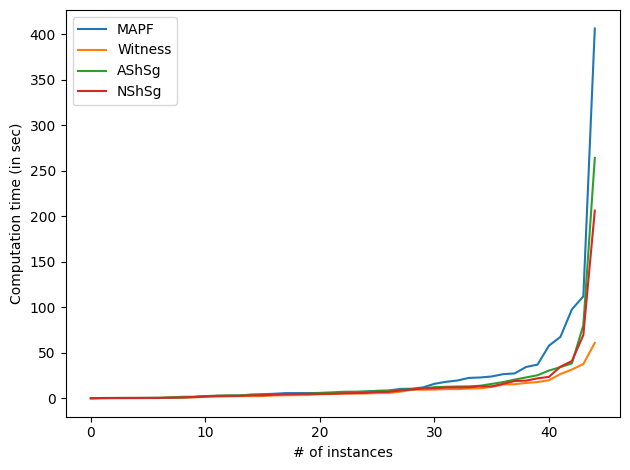

In [657]:

print(cactus)
print(considered_approaches)
for c,approach in enumerate(cactus.keys()):
    plt.plot(cactus[approach]['x'],sorted(cactus[approach]['y']),label=approaches_reference[approach]['name'])



plt.ylabel('Computation time (in sec)')
plt.xlabel('# of instances')
plt.legend()

plt.tight_layout()
plt.savefig('../plan-merging-report/img/plt_cactus_partial', dpi=144)

plt.show()



In [658]:
cactus = {}

for approach in considered_approaches:
    cactus[approach] = {'x':[0],'y':[0]}

    
    for instance in instances:
        if not instance in approaches[approach]:
            approaches[approach][instance] = [['time_out', timeout_value, 0 , 0, True, "{}"  ]]
    
    n_solved = 0

    for instance in instances:
        current_time = 0    
        n_solved += 1
        for step in approaches[approach][instance]:
            if step[0] == 'base_mapf':
                if step[4] == 'True':
                    current_time += float(step[1])
                break
            else: 
                if 'partial_solving_additional_horizon' == step[0]:
                    additional_data = json.loads(step[-1].replace("'", '"').replace('True', 'true').replace('False', 'false'))
                    
                    if additional_data['nagent'] == additional_data['ngoal_reached']:
                        current_time += float(step[1])
                        # n_solved +=1
                        break
                    else:
                        if step == approaches[approach][instance][-1]:
                            current_time += float(step[1])
                else:
                    current_time += float(step[1])
                    if 'partial_solving' == step[0]:
                        if step[4] == "False":
                            current_time += timeout_value
                        additional_data = json.loads(step[-1].replace("'", '"').replace('True', 'true').replace('False', 'false'))
                        current_time += float(step[1])
                        # current_time += float(timeout_value)

                        if additional_data['nagent'] == additional_data['ngoal_reached']:
                            # current_time -= float(timeout_value)
                            break
                        
                            
                    
                    
        if current_time < max_time:
            cactus[approach]['x'].append(n_solved)
            cactus[approach]['y'].append(current_time)

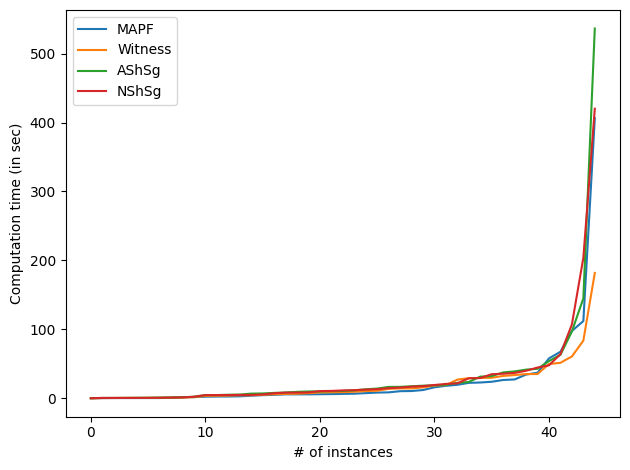

In [659]:
for c,approach in enumerate(cactus.keys()):
    plt.plot(((cactus[approach]['x'])),sorted(cactus[approach]['y']),label=approaches_reference[approach]['name'])


plt.xlabel('# of instances')
plt.ylabel('Computation time (in sec)')
plt.legend()

plt.tight_layout()
plt.savefig('../plan-merging-report/img/plt_cactus_fully', dpi=144)
plt.show()


In [660]:
cactus = {}

for approach in considered_approaches:
    cactus[approach] = {'x': [0], 'y': [0]}

    for instance in instances:
        if not instance in approaches[approach]:
            approaches[approach][instance] = [
                ['time_out', timeout_value, 0, 0, True, "{}"]]

    n_solved = 0

    for instance in instances:
        current_time = 0
        n_solved += 1
        for step in approaches[approach][instance]:
            if step[0] == 'base_mapf':
                if step[4] == 'True':
                    current_time += float(step[1])
                break
            else:
                if 'partial_solving_additional_horizon' == step[0]:
                    additional_data = json.loads(
                        step[-1].replace("'", '"').replace('True', 'true').replace('False', 'false'))

                    if additional_data['nagent'] == additional_data['ngoal_reached']:
                        current_time += float(step[1])
                        # n_solved +=1
                        break
                    else:
                        if step == approaches[approach][instance][-1]:
                            current_time += float(step[1])
                else:
                    current_time += float(step[1])
                    if 'partial_solving' == step[0]:
                        additional_data = json.loads(
                            step[-1].replace("'", '"').replace('True', 'true').replace('False', 'false'))
                        current_time += float(step[1])
                        # current_time += float(timeout_value)

                        if additional_data['nagent'] == additional_data['ngoal_reached']:
                            # current_time -= float(timeout_value)
                            break

        if current_time < max_time:
            cactus[approach]['x'].append(n_solved)
            cactus[approach]['y'].append(current_time)

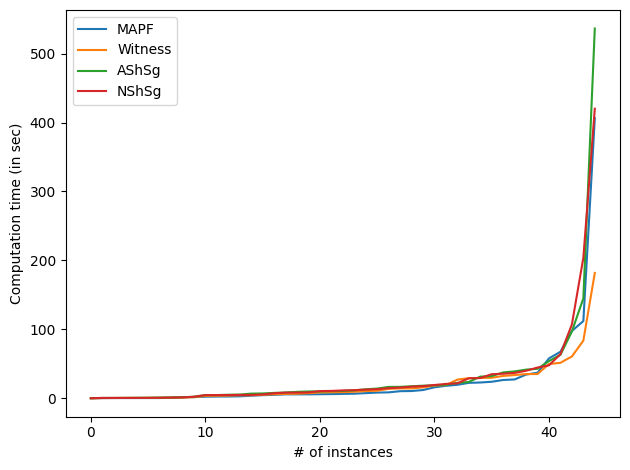

In [661]:
for c, approach in enumerate(cactus.keys()):
    plt.plot(((cactus[approach]['x'])), sorted(
        cactus[approach]['y']), label=approaches_reference[approach]['name'])


plt.xlabel('# of instances')
plt.ylabel('Computation time (in sec)')
plt.legend()

plt.tight_layout()
plt.savefig('../plan-merging-report/img/plt_cactus_fully', dpi=144)
plt.show()

In [662]:
considered_identifier = ['NShSg']
considered_approaches = []
for k in considered_identifier:
    for x in approaches_reference:
        if approaches_reference[x]['name'] == k:
            considered_approaches.append(x)

an = considered_approaches[0]


step_name_conversion = {'base_ipf': 'IPF', 
                        'heatmaps': 'Heatmaps Computation', 
                        'select_portion_based_on_heatmap': 'Summed Heatmap per Path',
                        'simple_threshold': 'Simple Threshold',

                        'path_elimination': 'Path Elimination', 
                        'path_selection': 'Path Selection', 
                        'partial_solving': 'Partial Solving',
                        # 'partial_solving_additional_horizon' : 'Modified horizon from 1 to 5', 
                        'random_path_selection' : 'Path Selection'
                        }


steps_time = {}
summed_time = 0
for instance in approaches[an]:
    for step in approaches[an][instance]:
        if 'additional_horizon' in step[0]:
            break
        additional_data = json.loads(
            step[-1].replace("'", '"').replace('True', 'true').replace('False', 'false'))

        step_name = step_name_conversion[step[0]]
        summed_time += float(step[1])
        if step_name in steps_time:
            steps_time[step_name] += float(step[1])
        else:
            steps_time[step_name] = float(step[1])

        if 'partial_solving' in step[0]:
            if additional_data['nagent'] == additional_data['ngoal_reached']:
                break
            
            

print(steps_time)

{'IPF': 49.02439880371094, 'Heatmaps Computation': 14.973718166351318, 'Summed Heatmap per Path': 0.010829448699951172, 'Path Elimination': 7.375699758529663, 'Path Selection': 8.013763189315796, 'Partial Solving': 551.8101208209991}


In [663]:
considered_identifier = ['Witness']
considered_approaches = []
for k in considered_identifier:
    for x in approaches_reference:
        if approaches_reference[x]['name'] == k:
            considered_approaches.append(x)

an = considered_approaches[0]


steps_time_witness = {}
summed_time_witness = 0
for instance in approaches[an]:
    for step in approaches[an][instance]:
        if 'additional_horizon' in step[0]:
            break
        additional_data = json.loads(
            step[-1].replace("'", '"').replace('True', 'true').replace('False', 'false'))

        step_name = step_name_conversion[step[0]]
        summed_time_witness += float(step[1])
        if step_name in steps_time_witness:
            steps_time_witness[step_name] += float(step[1])
        else:
            steps_time_witness[step_name] = float(step[1])

        if 'partial_solving' in step[0]:
            if additional_data['nagent'] == additional_data['ngoal_reached']:
                break
            

print(steps_time_witness)

{'IPF': 41.08798313140869, 'Path Selection': 1.9428932666778564, 'Partial Solving': 352.86418199539185}


In [664]:
print('\\begin{table}[]')
print('\centering')
print('\caption{Approach Decomposition}\label{tbl:approach_decomposition}')
print('\\begin{tabular}{@{}llllll@{}}')
print('\\toprule')
print('\multicolumn{1}{l|}{\multirow{2}{*}{Step Name}} & \multicolumn{3}{c|}{Total time} & \multicolumn{2}{c}{\% of the process} \\\\ \cmidrule(l){2-6}  ')
print('\multicolumn{1}{l|}{} & \multicolumn{1}{l|}{Id.} & \multicolumn{1}{c}{AShSg} & \multicolumn{1}{c|}{Witness} & \multicolumn{1}{c}{NShSg} & Witness \\\\ \midrule')
for s in steps_time:
    row = f"{s} & \cellcolor{'{lightgrey}'} & {int(steps_time[s])} & "
    if s in steps_time_witness :
        row += f'{int(steps_time_witness[s])}  &'
    else :
        row+= " - &"
    row += f"{int((steps_time[s]/summed_time)*100)}\% &"
    if s in steps_time_witness :
        row += f'{int((steps_time_witness[s]/summed_time_witness)*100)}\%  \\\\'
    else :
        row+= " - \\\\"
    print(row)

print('\end{tabular}')
print('\end{table}')
            

\begin{table}[]
\centering
\caption{Approach Decomposition}\label{tbl:approach_decomposition}
\begin{tabular}{@{}llllll@{}}
\toprule
\multicolumn{1}{l|}{\multirow{2}{*}{Step Name}} & \multicolumn{3}{c|}{Total time} & \multicolumn{2}{c}{\% of the process} \\ \cmidrule(l){2-6}  
\multicolumn{1}{l|}{} & \multicolumn{1}{l|}{Id.} & \multicolumn{1}{c}{AShSg} & \multicolumn{1}{c|}{Witness} & \multicolumn{1}{c}{NShSg} & Witness \\ \midrule
IPF & \cellcolor{lightgrey} & 49 & 41  &7\% &10\%  \\
Heatmaps Computation & \cellcolor{lightgrey} & 14 &  - &2\% & - \\
Summed Heatmap per Path & \cellcolor{lightgrey} & 0 &  - &0\% & - \\
Path Elimination & \cellcolor{lightgrey} & 7 &  - &1\% & - \\
Path Selection & \cellcolor{lightgrey} & 8 & 1  &1\% &0\%  \\
Partial Solving & \cellcolor{lightgrey} & 551 & 352  &87\% &89\%  \\
\end{tabular}
\end{table}


In [665]:
considered_identifier = [approaches_reference[s]['name'] for s in approaches_reference]

considered_identifier.remove('AShSg')
considered_identifier.remove('MAPF')
considered_identifier.remove('Witness')


considered_approaches = []
for k in considered_identifier:
    for x in approaches_reference:
        if approaches_reference[x]['name'] == k:
            considered_approaches.append(x)




step_name_conversion = {'base_ipf': 'IPF', 
                        'heatmaps': 'Heatmaps Computation', 
                        'select_portion_based_on_heatmap': 'Summed Heatmap per Path',
                        'path_elimination': 'Path Elimination', 
                        'path_selection': 'Path selection', 
                        'partial_solving': 'Partial Solving',
                        'partial_solving_additional_horizon' : 'Partial Solving with additional Horizon',
                        'simple_threshold' :  'Simple Threshold',
                        'strategy' : 'Subgraph extension strategy'
                        }


steps_time = {}
summed_time = 0
for an in considered_approaches:
    for instance in approaches[an]:
        for step in approaches[an][instance]:
            additional_data = json.loads(
                step[-1].replace("'", '"').replace('True', 'true').replace('False', 'false'))

            if step[0] != 'time_out':
                        
                step_name = step_name_conversion[step[0]]
                summed_time += float(step[1])
                if step_name in steps_time:
                    steps_time[step_name] += float(step[1])
                else:
                    steps_time[step_name] = float(step[1])

                if 'partial_solving' in step[0]:
                    if additional_data['nagent'] == additional_data['ngoal_reached']:
                        break



print('\\begin{table}[]')
print('\centering')
print('\caption{Approach Decomposition}\label{tbl:approach_decomposition}')
print('\\begin{tabular}{@{}llllll@{}}')
print('\\toprule')
print('\multicolumn{1}{l|}{\multirow{2}{*}{Step Name}} & \multicolumn{3}{c|}{Total time} & \multicolumn{2}{c}{\% of the process} \\\\ \cmidrule(l){2-6}  ')
print('\multicolumn{1}{l|}{} & \multicolumn{1}{l|}{Id.} & \multicolumn{1}{c}{AShSg} & \multicolumn{1}{c|}{Witness} & \multicolumn{1}{c}{AShSg} & Witness \\\\ \midrule')
for s in steps_time:
    row = 

print('\end{tabular}')
print('\end{table}')
            


SyntaxError: invalid syntax (1735751902.py, line 60)

In [ ]:
# % Please add the following required packages to your document preamble:
# % \usepackage{booktabs}
# % \usepackage{multirow}
# \begin{table}[]
# \begin{tabular}{@{}llllllllll@{}}
# \toprule
# \multirow{2}{*}{Approach Name} & \multirow{2}{*}{Total Time} & \multirow{2}{*}{\# Solved} & \multicolumn{7}{c}{\% Agent Completed}                                                                                                                                       \\ \cmidrule(l){4-10} 
#                                &                             &                            & \multicolumn{1}{l|}{Horizon} & \multicolumn{1}{c}{0} & \multicolumn{1}{c}{1} & \multicolumn{1}{c}{2} & \multicolumn{1}{c}{3} & \multicolumn{1}{c}{4} & \multicolumn{1}{c}{5} \\ \midrule
#                                &                             &                            &                              &                       &                       &                       &                       &                       &                      
# \end{tabular}
# \end{table}

In [ ]:
from wrapper import read, pretty_file_name, solver, mapf, base_ipf, pe_simple_threshold, global_heatmap, partial_solving, select_portion_based_on_heatmap

In [ ]:
# instances_pool_path = 'instances'
# instances_pool = [(pretty_file_name(file), read(path.join(instances_pool_path, file))) for file in os.listdir(
#     instances_pool_path) if path.isfile(path.join(instances_pool_path, file))]

# npaths = list(range(1,10)) + list(range(10,30,3)) + list(range(30,100,10))
# x_na = []
# x_a = []

# for npath in npaths:
#     total_na = 0
#     total_a = 0
#     print(npath)
#     for instance_name, instance_content in instances_pool:
#         r,s = base_ipf(instance_content,npaths=npath)
#         total_na += s.total_time
#         r,s = base_ipf(instance_content,npaths=npath,additional_paths_computation=True)
#         total_a += s.total_time
    
#     x_a.append(total_a)
#     x_na.append(total_na)


# plt.plot(npaths,x_na,label="No additional path computation")
# plt.plot(npaths,x_a,label="Additional path computation")

    
# plt.legend()
# plt.tight_layout()
# plt.show()
        

In [ ]:
# plt.plot(npaths,x_na,label="No additional path computation")
# plt.plot(npaths,x_a,label="Additional path computation")

    
# plt.legend()
# plt.tight_layout()
# plt.show()
        